# EDA Assignment at Epita
by Vivien Bogne

<hr style="border:2px solid black"> </hr>

# Step 1: Select a real-world dataset 

## 1.1. We selected dengAI dataset from a datadriven challenge
> https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/ 

The data has been collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce.

### Content of dataset 

The original challenge is to predict the number of dengue cases that is why the dataset consisted of 4 datasets:
- training datasets:
    - feature_training dataset 
    - labels_training dataset
- test datasets:
    - feature_test dataset
- submission datasets

But we are going to use only **training datasets** to perform an EDA. 

Before anything else we will merge the feature with the training

### The data will contain 1456 rows and 25 columns and is in CSV format

##  1.2. Introduction about the project

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.


Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring in Latin America.

### Task to do :

**Perform an Exploratory Data Analyst on the dataset in order to have a better understanding of how the number of dengue cases each week (in each location) are associated to environmental variables describing changes in temperature, precipitation, vegetation, and more.**


An understanding of the relationship between climate and dengue dynamics can improve research initiatives and resource allocation to help fight life-threatening pandemics.



<hr style="border:2px solid black"> </hr>

# Step 2: Perform data preparation & cleaning

In [1]:
# Import of useful libraries ( Path for filepath, pandas for dataframe manip and for dataviz seaborn and matplotlib)

from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create Variable for managing file and path
DATA_DIR = Path('C:/Users/vivie/Documents/GitHub/EDA_on_dengue_training_dataset/data')
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

## 2.1. Loading the dataset into a dataframe using Pandas and merge the trainings datasets

In [3]:
# creating the raw dataset
raw_features_training_df = pd.read_csv(RAW_DIR / 'dengue_features_train.csv')
raw_labels_training_df = pd.read_csv(RAW_DIR / 'dengue_labels_train.csv')

# concatenate feature_training with the label = number of total cases
raw_data_df = pd.concat([raw_features_training_df, raw_labels_training_df[["total_cases"]]], axis=1)

# displaying a sample of the data
raw_data_df.sample(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1159,iq,2004,42,2004-10-14,0.352329,0.284171,0.376414,0.355343,65.25,298.057143,...,94.160000,65.25,18.547143,8.357143,28.550000,11.300000,34.5,21.4,120.6,16
52,sj,1991,18,1991-04-30,0.209167,0.160575,0.176171,0.176171,0.00,298.831429,...,79.360000,0.00,16.314286,2.800000,27.314286,7.714286,32.2,22.8,2.8,17
1151,iq,2004,34,2004-08-19,0.393129,0.328643,0.276771,0.388514,23.78,297.820000,...,78.481429,23.78,14.961429,14.285714,NaN,NaN,NaN,21.7,0.5,6


> - We need to understand the meaning of each columns

So : 

- **'city'**: The place where the data were collected. This dataset has two cities in it: San Juan in Puerto Rico  and Iquitos in Peru.
- **'year'**: When the data were collected
- **'weekofyear'** : Which week of the year the data were collected
- **'week_start_date'** : The start date of the week of the year
- **'ndvi_ne', 'ndvi_nw','ndvi_se', 'ndvi_sw'** : Normalized Difference Vegetation Index ( NE: North East, NW: North West, SE)  is a simple graphical indicator that can be used to analyze remote sensing measurements, often from a space platform, assessing whether or not the target being observed contains live green vegetation. 
- **'precipitation_amt_mm'**: precipitation (Annual Rainfall) in mm  
Reanalysis is very popular and is used for monitoring climate change, for research and education, and for commercial applications.
- **'reanalysis_air_temp_k'**: reanalysis of the air temperature in Kelvin
- **'reanalysis_avg_temp_k'**: reanalysis of the average temperature in Kelvin
- **'reanalysis_dew_point_temp_k'**: reanalysis of the dew point temperature in Kelvin
- **'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k'**: reanalysis of the max and min air temperature in Kelvin
- **'reanalysis_precip_amt_kg_per_m2'**: reanalysis of the precipitation Annual Mean Temperature in kg per m2
- **'reanalysis_relative_humidity_percent'**: reanalysis of the percentage of the humidity
- **'reanalysis_sat_precip_amt_mm'**: reanalysis of the saturation's precipitation in mm
- **'reanalysis_specific_humidity_g_per_kg'**: reanalysis of the specific humidity in g per kg
- **'reanalysis_tdtr_k'**: reanalysis of the tdtr in K
- **'station_avg_temp_c'**: average temperature of the station in C
- **'station_diur_temp_rng_c'**: diurn temperature of the station in C
- **'station_max_temp_c','station_min_temp_c'**: max and mix temperature of the station in Celcius
- **'station_precip_mm'**: Station precipitation in mm  (AR)
- **'total_cases'** : Total number Dengue cases


In Overall we have 5 categories referring to different points in the cities, so they are not exactly the same data:
- temperature
- precipitation
- humidity
- ndvi
- number of total_cases

## 2.2. Explore the number of rows & columns, ranges of values etc.


In [4]:
# The shape
raw_data_df.shape

(1456, 25)

In [5]:
# The information
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

>- The data contain 1456 rows and 26 columns (20 floats, 4 integers and 2 Objects - probably string - )
>- The data has some non-null values ( for example in ndvi_ne, ndvi_nw, station_precip_mm etc. )

In [6]:
raw_data_df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


> - This is the statistic distribution ( count, range, mean, std and some quantiles )
> - We must preprocess the data before having a better distribution

## 2.3. Handle missing, incorrect and invalid data


# Missing values

In [7]:
# Number of missing values
raw_data_df.isnull().sum().sort_values()

city                                       0
week_start_date                            0
total_cases                                0
year                                       0
weekofyear                                 0
reanalysis_tdtr_k                         10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_relative_humidity_percent      10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_dew_point_temp_k               10
reanalysis_min_air_temp_k                 10
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_max_air_temp_k                 10
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
station_min_temp_c                        14
station_max_temp_c                        20
station_precip_mm                         22
ndvi_sw                                   22
ndvi_se                                   22
station_avg_temp_c                        43
station_di

In [8]:
# We will retrieve the list of columns having null values
null_val = raw_data_df.isnull()
is_null = null_val.sum().sort_values() 
is_null = is_null[is_null != 0].index

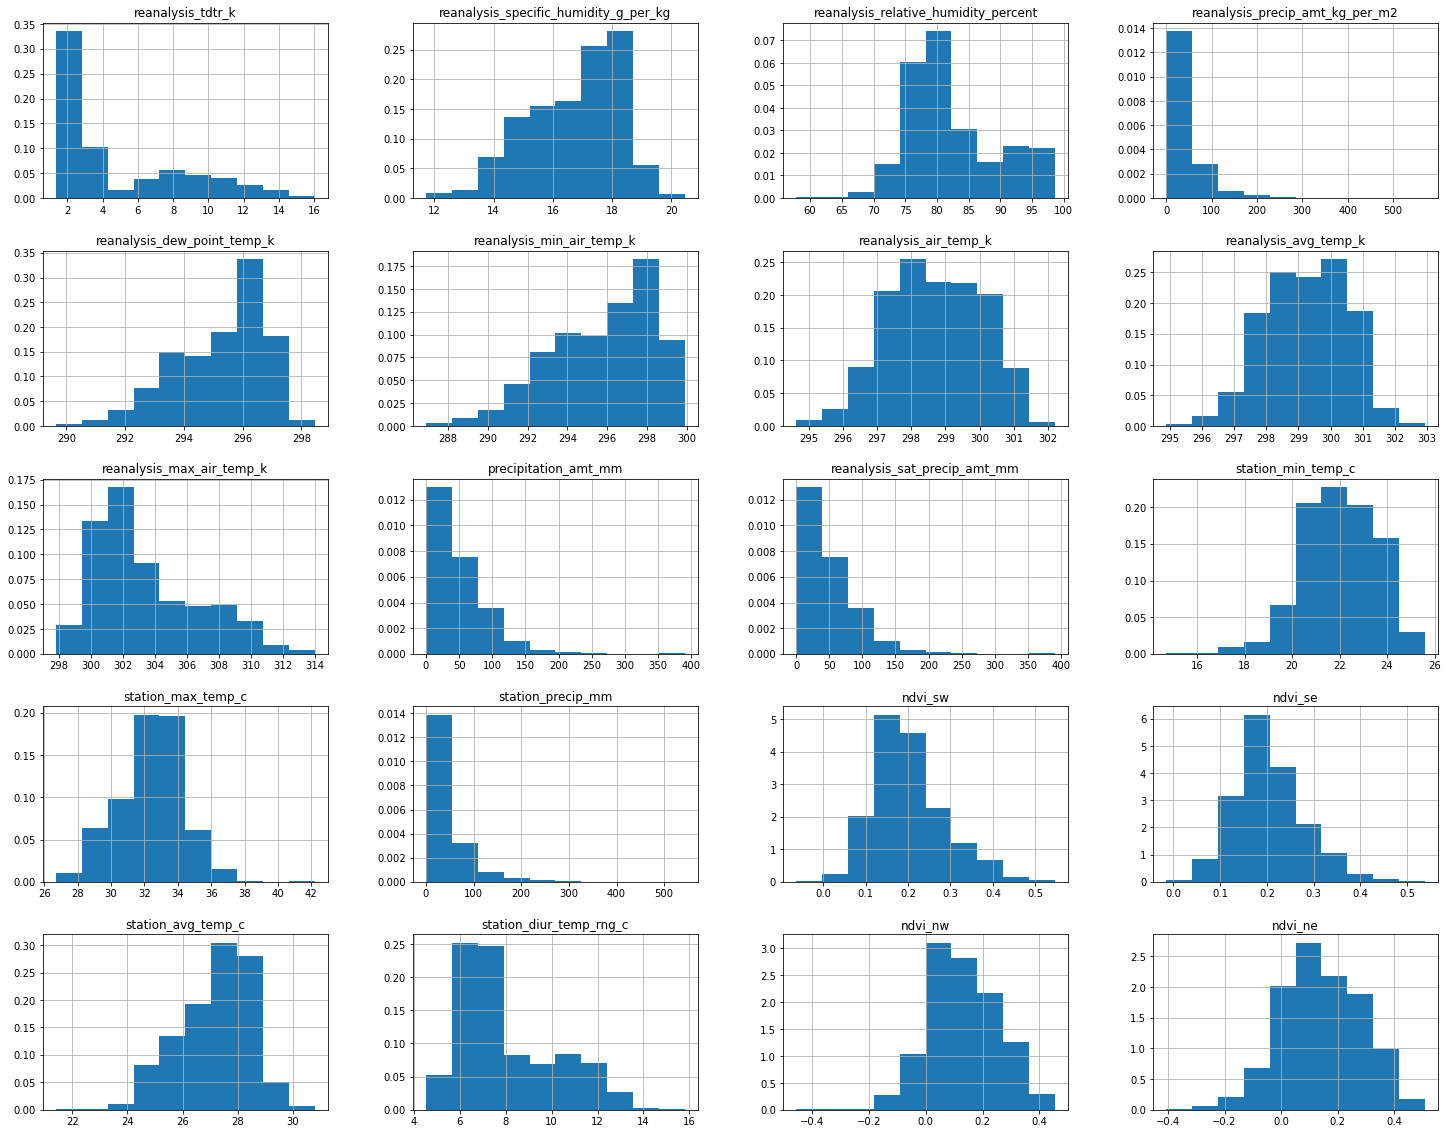

In [9]:
# Let us plot the hist/density of each variable and then select the appropriate value to handle missing values
raw_data_df[is_null].hist(figsize=(25, 20), density = True)
plt.show()

># How are we going to deal we null values?
>    - Since all those items are skewed( right or left ), we are going to use the median or the mode depending of the number of occurences.
>        - if the distribution is skew and the number of element close to the total population we will use median 
>        - else we will use mode because of the number of times the unique value are occuring

In [10]:
# let us count the number of unique 
raw_data_df[is_null].nunique().sort_values()

station_max_temp_c                         73
station_min_temp_c                         73
reanalysis_min_air_temp_k                 117
reanalysis_max_air_temp_k                 141
station_diur_temp_rng_c                   470
station_avg_temp_c                        492
reanalysis_tdtr_k                         519
reanalysis_avg_temp_k                     600
station_precip_mm                         663
reanalysis_precip_amt_kg_per_m2          1039
precipitation_amt_mm                     1157
reanalysis_sat_precip_amt_mm             1157
reanalysis_specific_humidity_g_per_kg    1171
reanalysis_air_temp_k                    1176
reanalysis_dew_point_temp_k              1180
ndvi_ne                                  1214
ndvi_nw                                  1365
reanalysis_relative_humidity_percent     1370
ndvi_sw                                  1388
ndvi_se                                  1395
dtype: int64

# So This is how we are going to deal:
>- Replace null value with the mode for columns : station_max_temp_c, station_min_temp_c, reanalysis_min_air_temp_k, reanalysis_max_air_temp_k because they have multiple occurence for some values.
>- Replace null value with the median for columns for the others.

In [11]:
# Split the null columns 
null_val_with_mode_col = ['station_max_temp_c', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k']
null_val_with_median_col = [elt for elt in is_null if elt not in null_val_with_mode_col]

In [12]:
# Compute the mode and median for the correspondant columns
mode_to_replace = raw_data_df[null_val_with_mode_col].mode().iloc[0].to_dict()
median_to_replace = raw_data_df[null_val_with_median_col].median().to_dict()

In [13]:
# Now we handle the null values
raw_data_df[null_val_with_mode_col] = raw_data_df[null_val_with_mode_col].fillna(value = mode_to_replace)
raw_data_df[null_val_with_median_col] = raw_data_df[null_val_with_median_col].fillna(value = median_to_replace)

In [14]:
raw_data_df[null_val_with_mode_col].isnull().sum()

station_max_temp_c           0
station_min_temp_c           0
reanalysis_min_air_temp_k    0
reanalysis_max_air_temp_k    0
dtype: int64

In [15]:
raw_data_df[null_val_with_median_col].isnull().sum()

reanalysis_tdtr_k                        0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_relative_humidity_percent     0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_dew_point_temp_k              0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
precipitation_amt_mm                     0
reanalysis_sat_precip_amt_mm             0
station_precip_mm                        0
ndvi_sw                                  0
ndvi_se                                  0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
ndvi_nw                                  0
ndvi_ne                                  0
dtype: int64

## 2.4. Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [16]:
# we will create numerical columns and categorical columns
numerical_columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']
categorical_columns = ['city', 'year', 'weekofyear', 'week_start_date']


In [17]:
# We need to convert week_start_date into datetime to retrieve day and month
# We already have year and weekofyear we will retrieve day and month
from datetime import datetime
convert_week_start_date = raw_data_df['week_start_date'].astype('datetime64[ns, US/Eastern]')

# now we will create day and month columns as day, month
raw_data_df['day'] = convert_week_start_date.dt.day
raw_data_df['month'] = convert_week_start_date.dt.month

# and add to columns to categorical variable
categorical_columns = categorical_columns + ['day', 'month']

<hr style="border:2px solid black"> </hr>

### Step 3: Perform exploratory analysis & visualization

## 3.1. Compute the mean, sum, range and other interesting statistics for numeric columns


In [18]:
# With the command describe we can have the Statistics of every columns
raw_data_df[numerical_columns].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.140498,0.130227,0.203666,0.202111,45.694135,298.701472,299.226016,295.249065,303.415934,295.734821,...,82.149181,45.694135,16.748767,4.889698,27.192532,8.036903,32.457212,22.119437,39.092514,24.675137
std,0.130908,0.117847,0.073305,0.083281,43.525407,1.357737,1.257383,1.522899,3.226268,2.563469,...,7.130928,43.525407,1.537442,3.538279,1.273696,2.100818,1.946226,1.576276,47.133032,43.596000
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,0.055625,0.051367,0.155625,0.144718,9.960000,297.665000,298.264286,294.130357,301.000000,293.900000,...,77.226429,9.960000,15.561429,2.328571,26.328571,6.528571,31.100000,21.100000,8.850000,5.000000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,300.207143,296.456071,305.500000,298.000000,...,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000,28.000000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


## 3.2. Explore distributions of numeric columns using histograms etc.


As we did explore distribution for null columns, we will do the same for numeric columns.

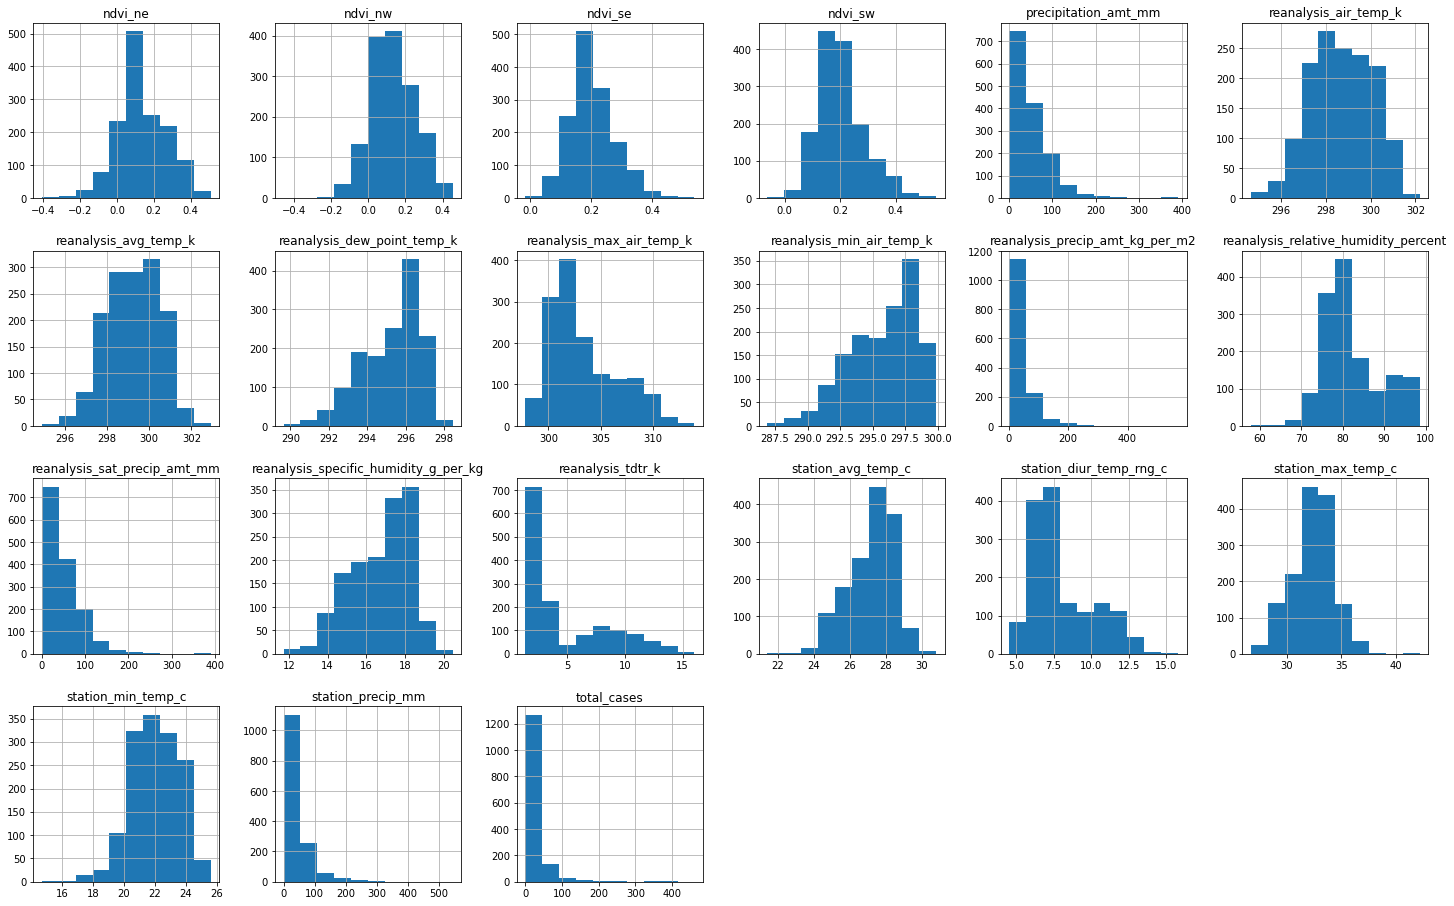

In [19]:
raw_data_df[numerical_columns].hist(figsize = (25, 20), layout = (5, 6))
plt.show()

We observed the following pattern :
- The are all skew right and left
> So for a better predicting model we will reduce the skewness
- They doesnt have the same scale ( perhabs later will we need to normalize them ).
> so for a better predicting model we will scale them

Let us use boxplot to go deep into theses details

# Boxplot

##### Before scaling all the variable let us split them to some scale and display the distribution
For that, We will display the distribution having the same scale together. That is :
- **scale1  -1 to 1** : 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'
- **scale2 between 0 and 50** : 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k','station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c'
- **scale3 between 200 and 400** :  'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'
- **scale3 between 0 and 500** : 'precipitation_amt_mm', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm', 'total_cases'

In [20]:
# let us create those scales columns
num_scale1 = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
num_scale2 = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k','station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c']
num_scale3 = [ 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k' , 'reanalysis_min_air_temp_k']
num_scale4 = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm', 'total_cases']

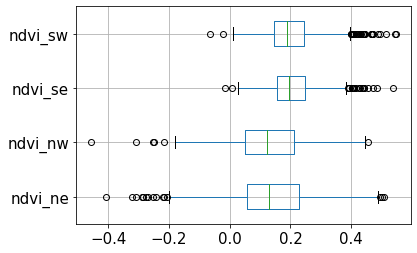

In [21]:
# Scale1
raw_data_df.boxplot(column = num_scale1, fontsize = 15, vert = False)
plt.show()

>- They seem to have the same distribution 
>- They all have outliers 
>- ndvi_se has the higher median

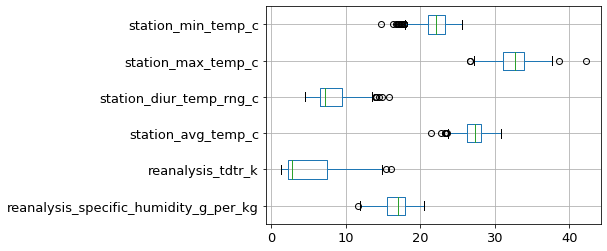

In [22]:
# Scale2
raw_data_df.boxplot(column = num_scale2, fontsize = 13, vert = False) 
plt.show()

>- They seem to have different distribution 
>- They also have outliers even if the reanalysis specific umidity g per kg only have one value 

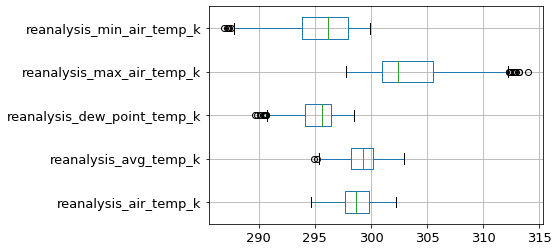

In [23]:
# Scale3
raw_data_df.boxplot(column = num_scale3, fontsize = 13, vert = False)
plt.show()

> The reanalysis_air_temp_k does not have outliers.
> There is a variance amongst median

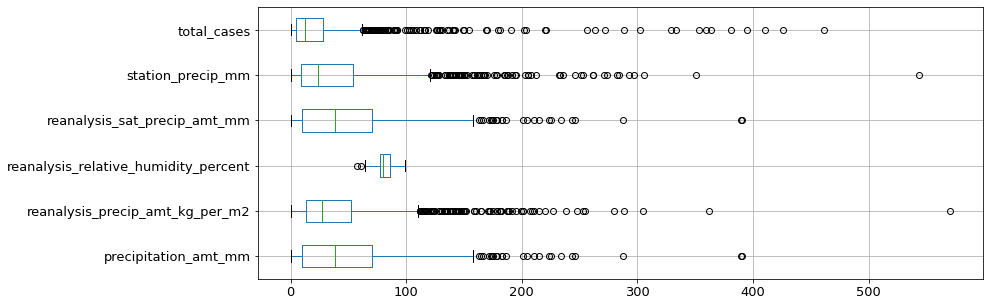

In [24]:
# Scale3
raw_data_df.boxplot(column = num_scale4, fontsize = 13, vert = False, figsize=(13,5))
plt.show()

# Boxplot summary:


We observed the following pattern :
- All the columns have outliers (event the target) except reanalysis_air_temp_k ( we found with the histogram that they are all skew right and/or left )
> So we could preprocess the data by removing outliers for a better prediction model.
- The first scale of variable have seems to have the same distribution. 
> So for a better prediction model, we could make a features engineering to combine them and they reduce fitting problems.

## Scaling the dataset

In [25]:
# Load libraries
import numpy as np
from sklearn import preprocessing

# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(-1, 1))

# Scale feature
raw_data_df[numerical_columns] = minmax_scale.fit_transform(raw_data_df[numerical_columns])

# Show feature
raw_data_df[numerical_columns]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.156453,0.229670,-0.227164,-0.208912,-0.936406,-0.223418,-0.290667,-0.370641,-0.753086,0.384615,...,-0.236772,-0.936406,-0.474681,-0.826680,-0.139818,-0.579214,-0.651613,-0.027523,-0.941101,-0.982646
1,0.259885,0.314127,-0.357620,-0.281535,-0.883154,-0.054580,-0.116444,-0.021573,-0.617284,0.461538,...,-0.040663,-0.883154,-0.163672,-0.861733,0.130699,-0.673004,-0.354839,0.376147,-0.968342,-0.978308
2,-0.041118,0.381762,-0.376242,-0.231140,-0.823144,0.096128,-0.008000,0.315166,-0.666667,0.600000,...,0.188830,-0.823144,0.173799,-0.871470,0.130699,-0.652725,-0.290323,0.486239,-0.847598,-0.982646
3,0.169646,0.540131,-0.122176,-0.017701,-0.921352,0.150519,0.079111,0.286942,-0.555556,0.553846,...,0.104773,-0.921352,0.133616,-0.853944,0.291793,-0.602028,-0.148387,0.577982,-0.985275,-0.986985
4,0.317396,0.577765,-0.036799,0.019887,-0.961495,0.291029,0.187556,0.403082,-0.493827,0.630769,...,0.110792,-0.961495,0.256452,-0.774099,0.604863,-0.140684,0.070968,0.688073,-0.978649,-0.973970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.637862,0.702308,-0.018227,0.168127,-0.716846,0.242304,0.463111,0.631144,0.469136,0.169231,...,0.517707,-0.716846,0.548187,0.150925,0.539007,0.313899,0.122581,0.412844,-0.900607,-0.978308
1452,0.238580,0.354096,-0.452643,-0.051266,-0.557245,-0.023229,0.120000,0.546472,0.320988,-0.230769,...,0.656565,-0.557245,0.453120,-0.166504,0.283688,0.059569,0.032258,0.284404,-0.865268,-0.965293
1453,0.428607,0.322654,-0.039843,-0.024826,-0.698208,-0.481020,-0.328000,0.330414,-0.049383,-0.153846,...,0.787864,-0.698208,0.210389,-0.162610,-0.361702,-0.579214,-0.290323,-0.174312,-0.972759,-0.995662
1454,0.618540,0.541679,0.063177,0.276323,-0.694470,-0.547875,-0.345778,0.290187,0.024691,-0.230769,...,0.806481,-0.694470,0.166286,-0.111977,-0.141844,-0.253908,-0.419355,0.155963,-0.941101,-0.995662


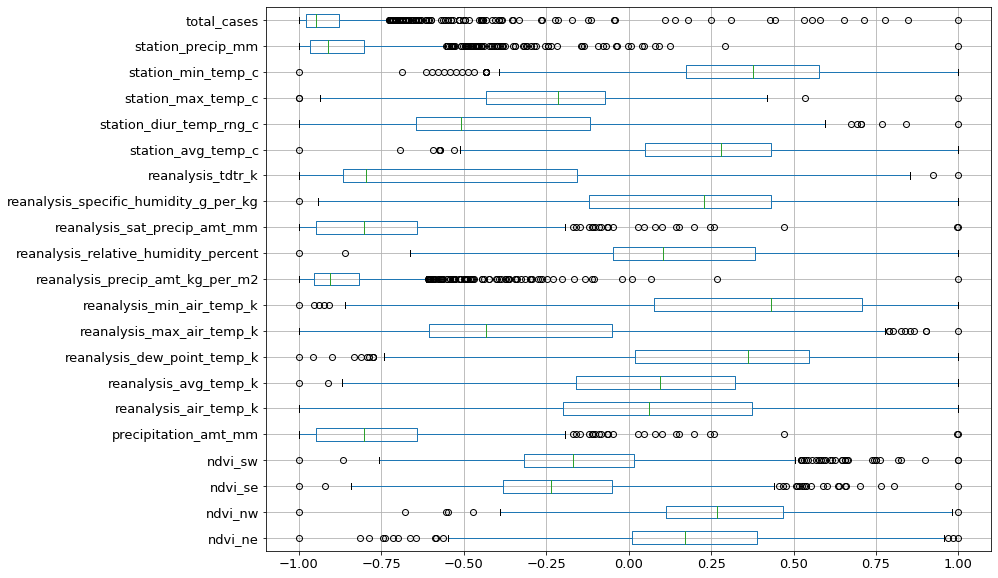

In [26]:
# Now we can display all the numerical columns distribution
raw_data_df.boxplot(column = numerical_columns, fontsize = 13, vert = False, figsize=(13,10))
plt.show()

<hr style="border:2px solid black"> </hr>

### Step 4: Ask & answer questions about the data


## Using this Dengue dataset We are going to Ask and answer some questions

### 1.    Does one or more predictors have a positive or negative correlation with number of Dengue cases?

### Numerical columns

> We will use Correlation

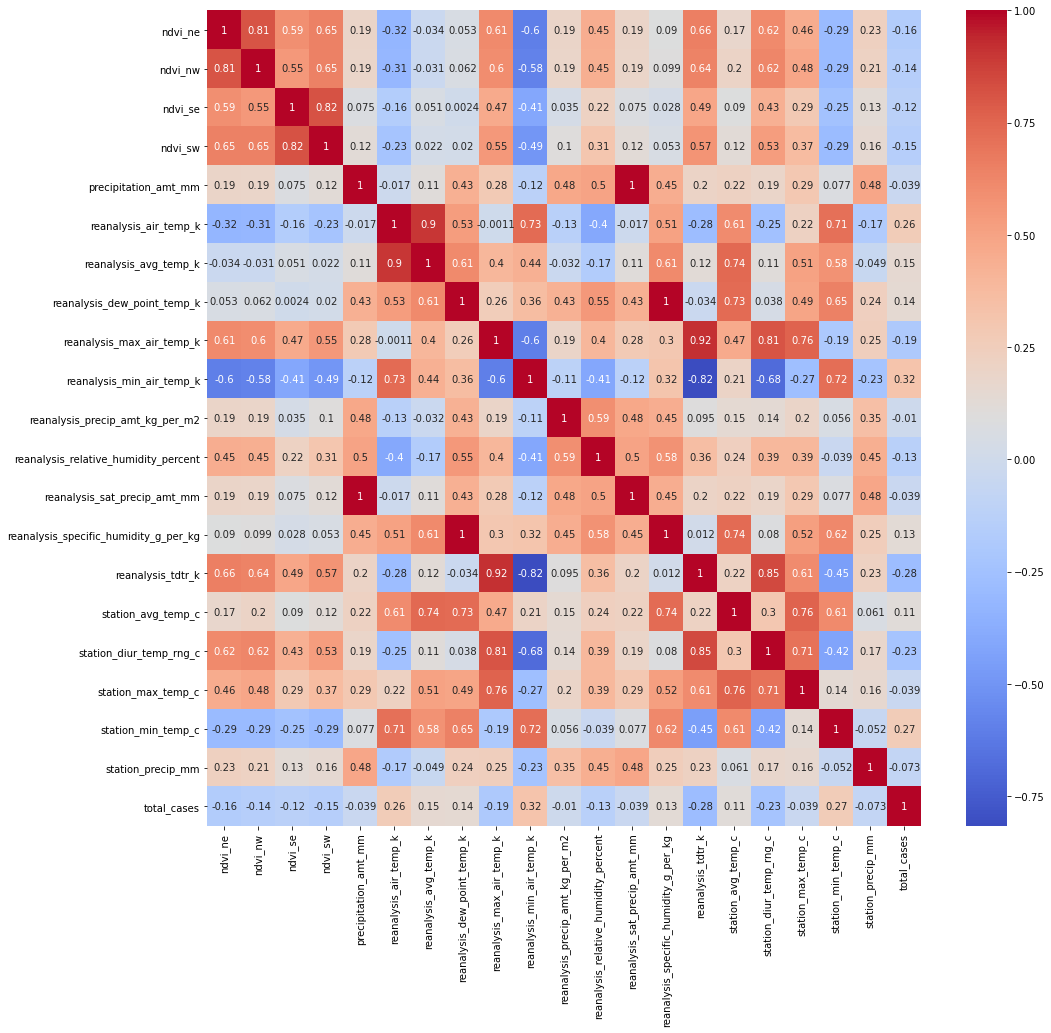

In [27]:
f, ax = plt.subplots(figsize=(16, 15))
sns.heatmap(raw_data_df[numerical_columns].corr(),  annot=True, ax = ax, cmap = 'coolwarm')
plt.show()

We have the following result 
>- 7 numericals columns has the biggest impact on number of Dengue cases because of their Pearson correlation above 0 ( with total_cases ): **reanalysis_air_temp_k**, **reanalysis_dew_point_temp_k**, **reanalysis_avg_temp_k**, **reanalysis_min_air_temp_k**, **reanalysis_specific_humidity_g_per_kg**, **station_avg_temp**, **station_min_temp_c**

### Categorical columns

In [28]:
categorical_columns

['city', 'year', 'weekofyear', 'week_start_date', 'day', 'month']

let us remove 'week_start_date'

In [29]:
categorical_columns.remove('week_start_date')

In [30]:
categorical_columns

['city', 'year', 'weekofyear', 'day', 'month']

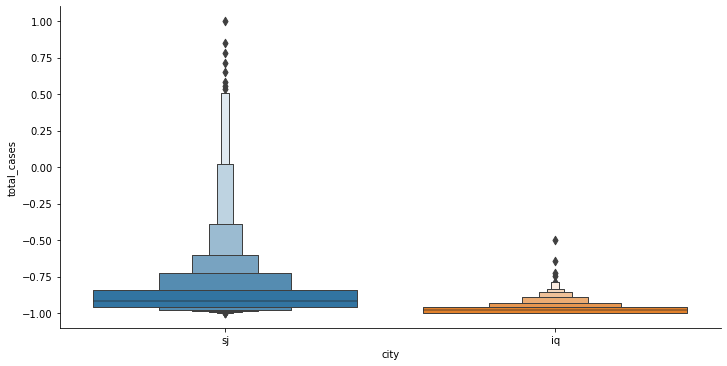

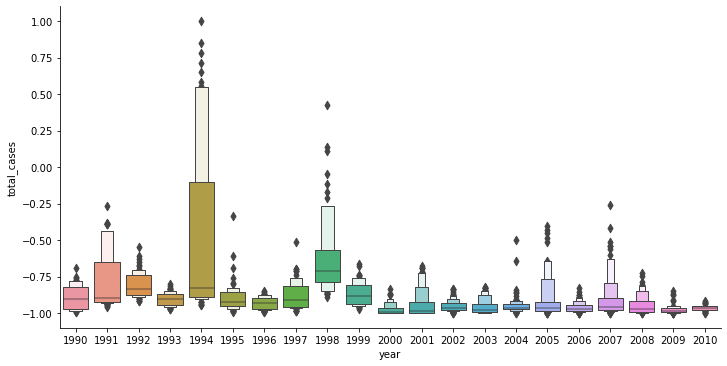

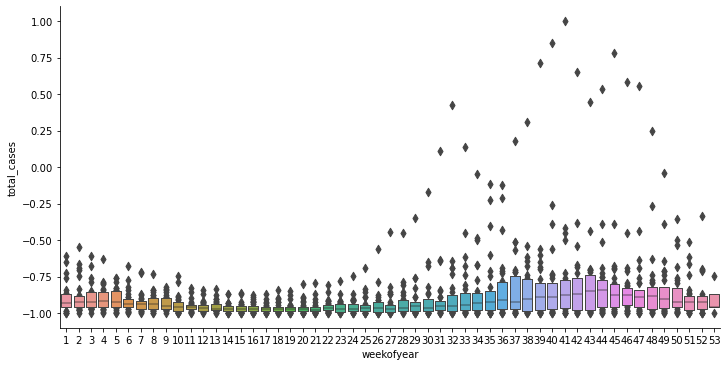

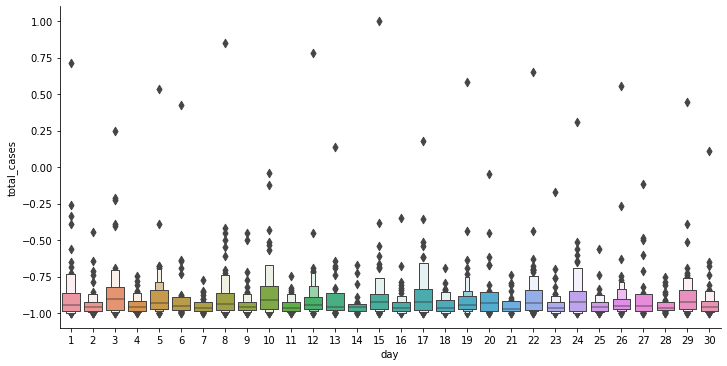

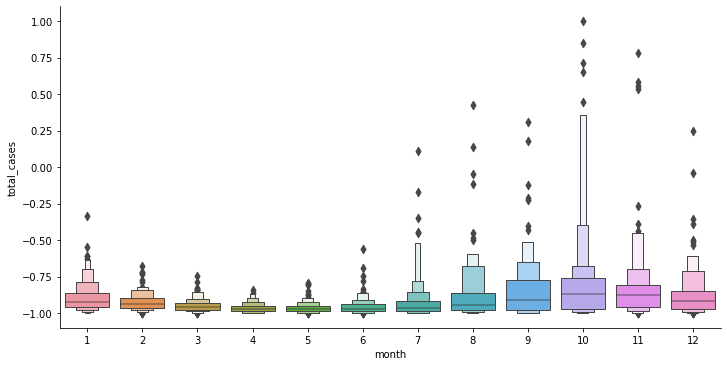

In [31]:
for col in categorical_columns:
    sns.catplot(x= col, y='total_cases',        
                data= raw_data_df, 
                height=5, aspect=2,
                kind="boxen")
plt.show()

So we observe the following pattern: 

>- The city sj have the most cases of dengue more than 7 times that the city iq
>- 1994 is the year with most cases then 1998.
>- October is the month with the most cases thus week of the year

## 2.    what is the relationships between various variables ?


>Because of what we discover previously, we already know that the city, the month, the year have relationship with the total number of cases,<br>
> Now, let us display relationships between the 7 numerical columns high correlated

In [32]:
various_variable = ['city', 'year', 'month', 'reanalysis_air_temp_k', \
                    'reanalysis_dew_point_temp_k', 'reanalysis_avg_temp_k', \
                    'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'station_min_temp_c', 'total_cases']

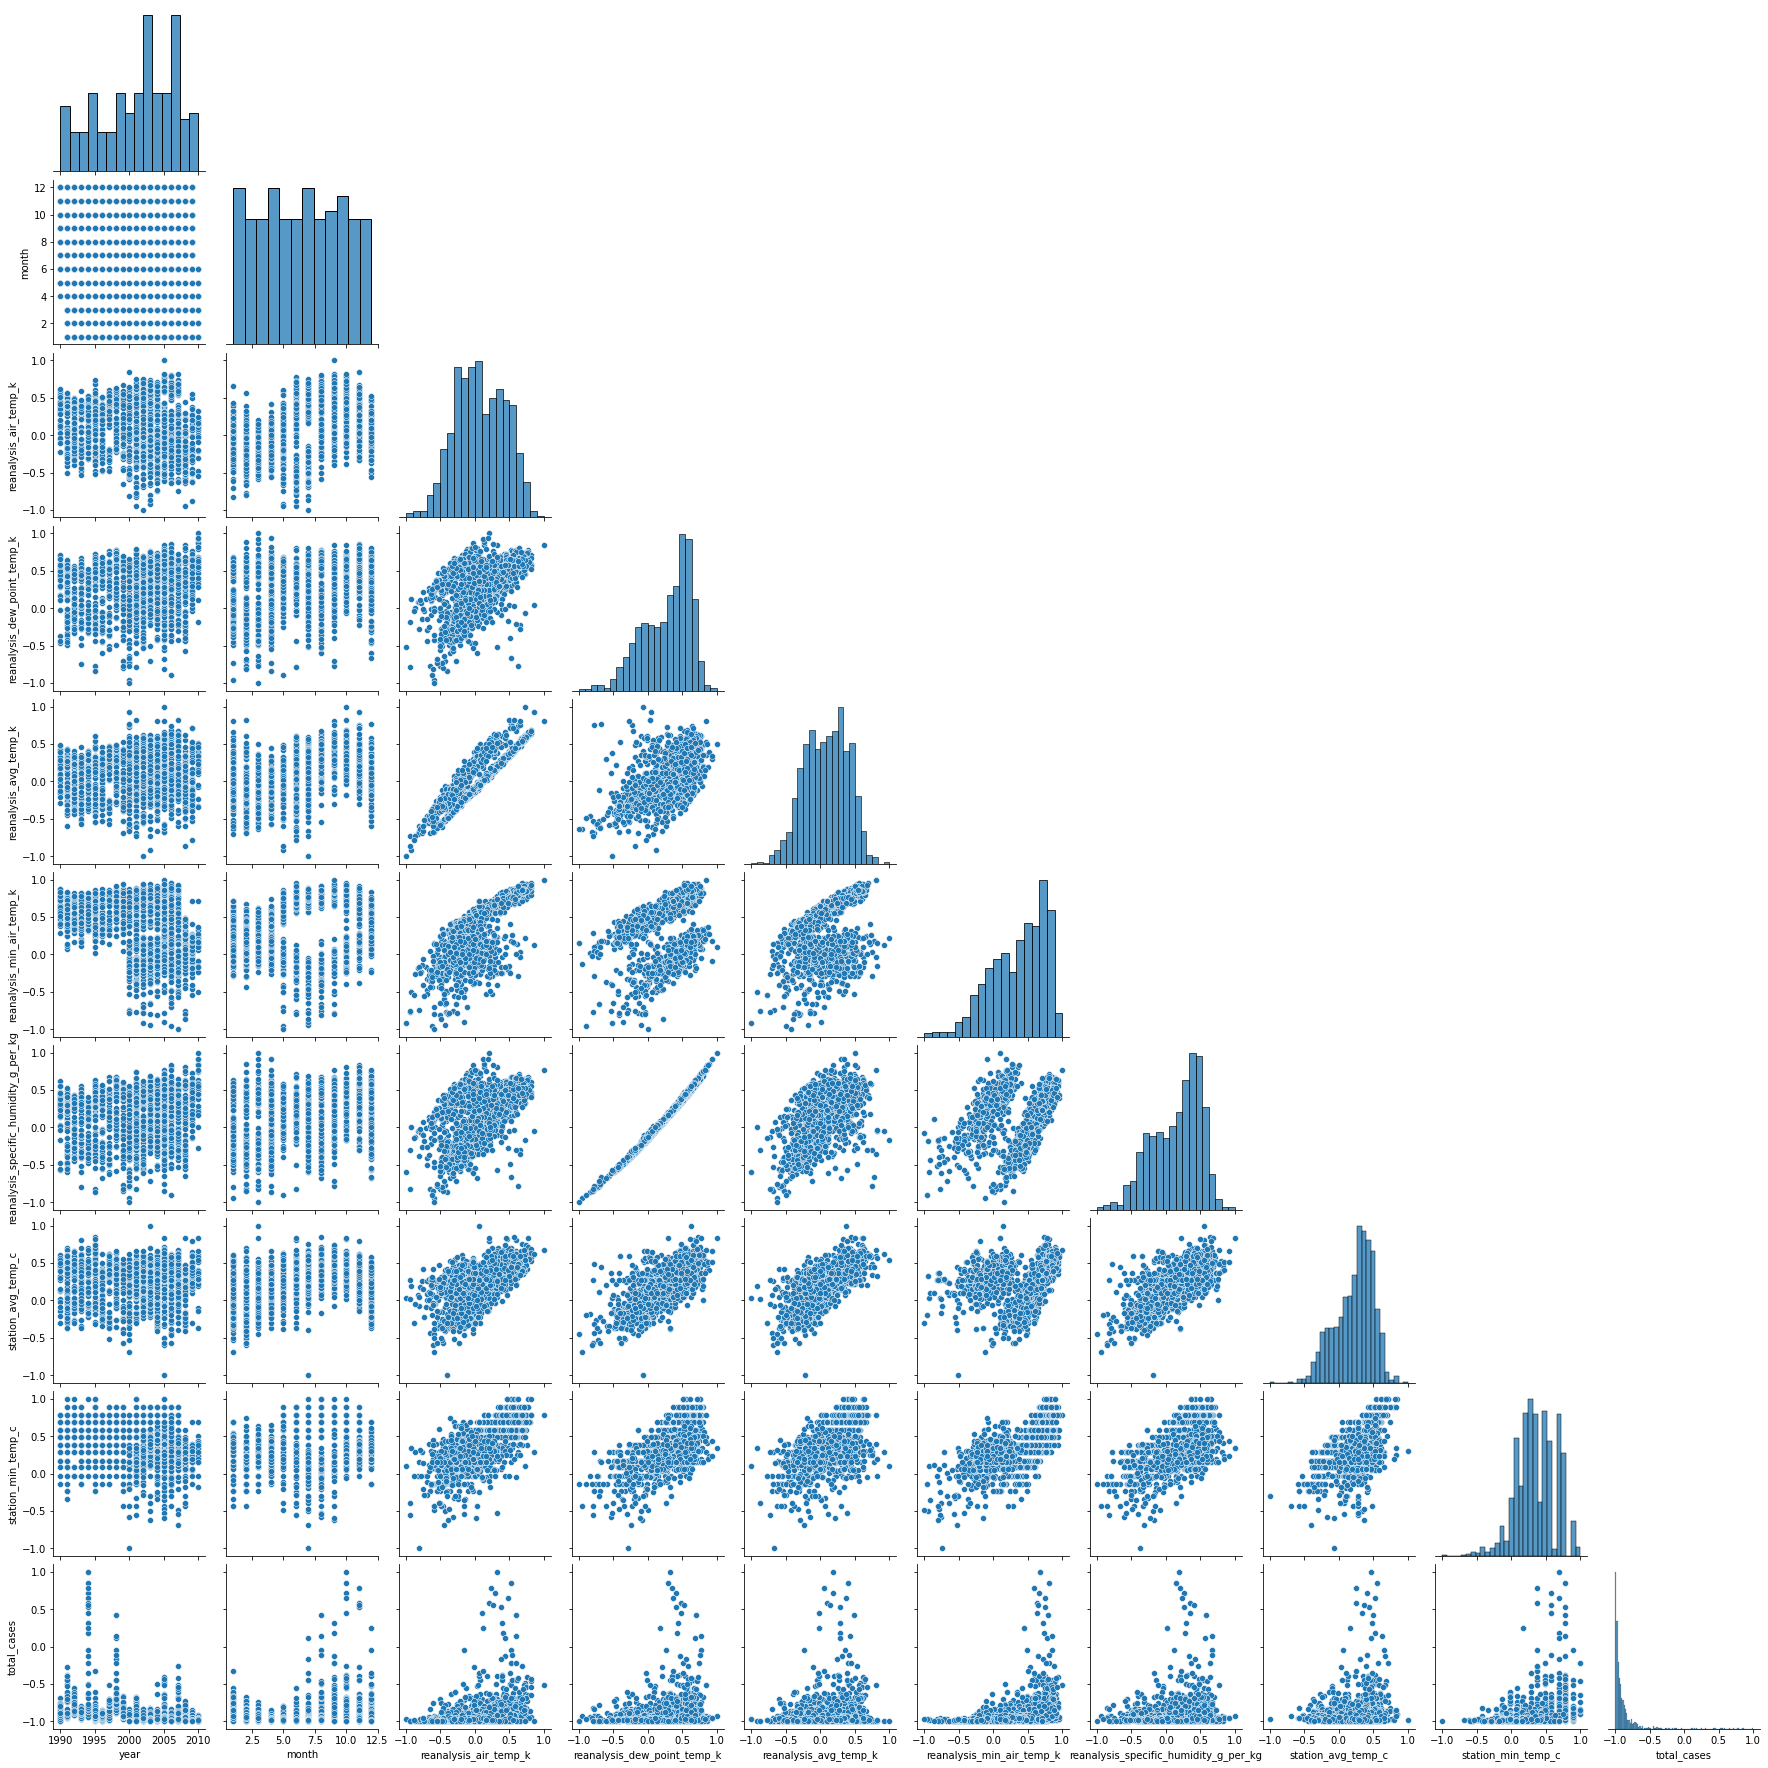

In [33]:
sns.pairplot(raw_data_df[various_variable], corner= True)
plt.show()

> This pairplot shows :
>- Strong relationship between :
>    - reanalysis specificy humidity and reanalysis dew_point temperature
>    - reanalysis air temperature and reanalysis average temperature
>- 4 diagram with 2 cluster between :
>    - reanalysis min air temperature and reanalysis dew point temperature
>    - reanalysis min air temperature and  reanalysis average temperature
>    - reanalysis specificy humidity and reanalysis reanalysis_min_air_temp_k
>    - station average temperature and reanalysis reanalysis_min_air_temp_k
>- No evident relationship between the number of cases and thoses various variables

### 3.    Do various predicting factors that has been chosen initially really affect the number of Dengue cases? 


> Yes and we can reduce the number of predictors to 5 numerical columns and 3 cat ( city, month, year)

### 4.   Do temperature have an impact of on number of Dengue cases?

In [34]:
various_variable

['city',
 'year',
 'month',
 'reanalysis_air_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_min_temp_c',
 'total_cases']

In [35]:
# Finally we can thake as predictors
features = ['city',
 'year',
 'month',
 'reanalysis_avg_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_min_temp_c']

In [36]:
# And our target number of Dengue Cases
target = ['total_cases']

##### Amongst the features we have 4 temperatures features :
- 'reanalysis_avg_temp_k',
- 'reanalysis_min_air_temp_k',
-  'station_avg_temp_c',
- 'station_min_temp_c'

#### 5. What other climate variable will have impact on the number of cases

According to the previous plot and analysis, we will as climate variable:
- temperature as mentionned above,
- specific humidity

Precipitation is dependant to specify humidity and temperature and that is why it has be removed

#### 6. Are some days of the week more prone to multiple cases of dengai than others?

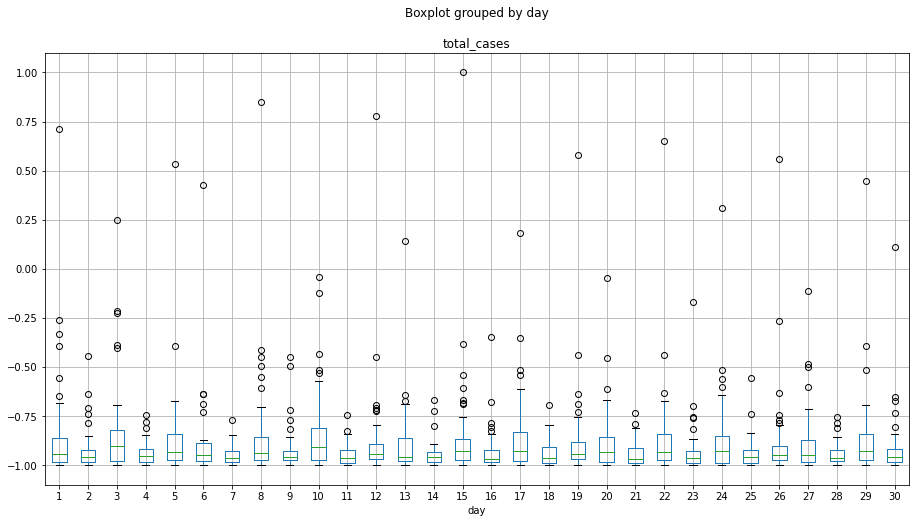

In [37]:
raw_data_df.boxplot(column=target, by='day', figsize=(15,8))
plt.show()

> It is hardly difficult to say wether a day of a week have more influence on the number of cases

#### 6. Are some months of the year more prone to multiple cases of dengai than others?

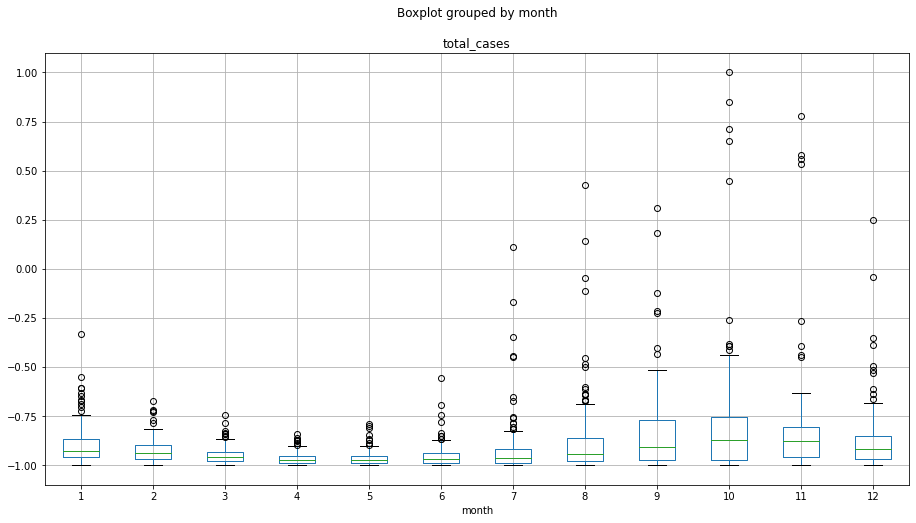

In [38]:
raw_data_df.boxplot(column=target, by='month', figsize=(15,8))
plt.show()

>- September and December are more prone to high number of dengue disease.
>- The explanation could be the fact that in thoses city, it is the raining season

<hr style="border:2px solid black"> </hr>

### Step 5: Summarize your inferences & write a conclusion

# Conclusion 
At this point, we didn’t even start creating the model but we already know that:
>- Only 7 columns can be use as features because some of the features are less important than others and some of them are just repeating the same data.
>- The climate have strong relationship with the city, the date, the temperature, specific humidity and precipitation.
The main features for climate are: 
>    - temperature as mentionned above,
>    - specific humidity
>- Temperature have an impact of on number of Dengue cases?
>- September and December are more prone to high number of dengue disease.


To conclude we can say after the analysis that depending on the climate the number of DengAi is fluctuating

# Ideas for future work
>- Instead of drop the column which are less correlated or dependant, it would be better to make a PCA


# Links and Ressources I found useful during the EDA

<li> https://www.cdc.gov/ 
<li> https://www.noaa.gov/

### Step 6: Submit your work 
- use the attachment feature of teams

